### Do your imports!

In [24]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [25]:
df = pd.read_csv("subset.csv", encoding='utf-8', nrows= 7000000, na_values=['UNKNOWN'])

/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [3]:
df.head(15)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
5,41694425,02/13/2019 12:44:06 AM,02/13/2019 09:16:20 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
6,41694426,01/31/2019 08:31:53 PM,02/13/2019 02:48:55 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
7,41694430,02/13/2019 10:31:12 AM,02/21/2019 02:16:41 PM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE
8,41694431,01/27/2019 09:24:14 PM,02/13/2019 01:45:47 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
9,41694432,02/13/2019 12:37:00 PM,02/14/2019 12:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [26]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head(15)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Develop...,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE
5,41694425,02/13/2019 12:44:06 AM,02/13/2019 09:16:20 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11219,1238 50 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
6,41694426,01/31/2019 08:31:53 PM,02/13/2019 02:48:55 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10040,9 SHERMAN AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE
7,41694430,02/13/2019 10:31:12 AM,02/21/2019 02:16:41 PM,DOT,Department of Transportation,Sidewalk Condition,Sidewalk Violation,Sidewalk,11420,109-40 128 STREET,ADDRESS,SOUTH OZONE PARK,Closed,QUEENS,PHONE
8,41694431,01/27/2019 09:24:14 PM,02/13/2019 01:45:47 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,11225,827 NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
9,41694432,02/13/2019 12:37:00 PM,02/14/2019 12:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Jack Hammering (NC2),NaN,10018,17 WEST 38 STREET,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE


# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [27]:
df.dtypes
# datetimes are strings

unique_key                 int64
created_date              object
closed_date               object
agency                    object
agency_name               object
complaint_type            object
descriptor                object
location_type             object
incident_zip              object
incident_address          object
address_type              object
city                      object
status                    object
borough                   object
open_data_channel_type    object
dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [28]:
df.created_date = pd.to_datetime(df.created_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

In [29]:
df.closed_date = pd.to_datetime(df.closed_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
#df.dtypes

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [30]:
df.created_date.dt.month.value_counts()

1     694772
6     685662
3     684636
5     658650
4     616563
2     610888
11    577166
7     545242
8     543544
12    508286
10    485299
9     389292
Name: created_date, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [31]:
df.resample('M', on='created_date').size().sort_values(ascending=False)

# May 2019 had the most 311 calls

created_date
2019-05-31    221816
2019-03-31    207065
2019-04-30    202331
2020-06-30    190690
2019-06-30    175074
               ...  
2014-06-30      2595
2014-09-30      2570
2020-09-30      2517
2014-08-31      2478
2021-02-28      1954
Length: 143, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

<AxesSubplot:xlabel='created_date'>

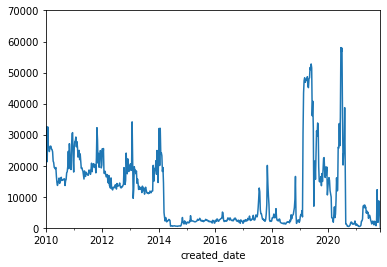

In [32]:
df.resample('W', on='created_date').size().plot(ylim=(0,70000))

## What time of day (by hour) is the least common for 311 complains? The most common?


In [33]:
df.created_date.dt.hour.value_counts().sort_values()

# the most common hour is midnight
# the less common hour is 4 am

4       27894
5       32244
3       32939
2       49788
6       63616
1       72143
7      132333
23     140989
20     155923
22     165670
21     167557
18     172635
19     175313
17     187843
8      222637
16     238927
15     280902
13     295925
9      313455
14     321768
11     332724
12     333280
10     343926
0     2739569
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:title={'center':'4AM is the lowest point of 311 submissions'}>

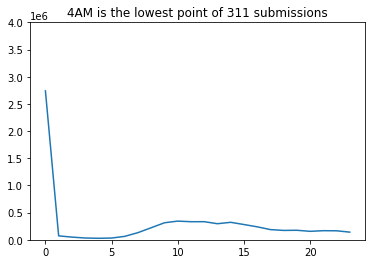

In [54]:
df.created_date.dt.hour.value_counts() \
    .sort_index() \
    .plot(
        ylim=(0, 4000000),
        title='4AM is the lowest point of 311 submissions'
    )

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [17]:
df.agency.value_counts().head()

HPD     3212165
DOT      883962
NYPD     843960
DSNY     736619
DOB      517204
Name: agency, dtype: int64

## What is the most common complaint to HPD?

In [35]:
df[df.agency == 'HPD'].complaint_type.value_counts()

HEATING                   875639
GENERAL CONSTRUCTION      498659
PLUMBING                  462080
PAINT - PLASTER           359727
NONCONST                  257554
HEAT/HOT WATER            256188
ELECTRIC                  174591
UNSANITARY CONDITION       78002
APPLIANCE                  55173
PAINT/PLASTER              49670
DOOR/WINDOW                32700
WATER LEAK                 31952
GENERAL                    29009
FLOORING/STAIRS            19651
HPD Literature Request     13644
SAFETY                      9171
CONSTRUCTION                4989
ELEVATOR                    1392
Unsanitary Condition        1097
OUTSIDE BUILDING             891
General                      294
Safety                        72
STRUCTURAL                    16
Outside Building               3
VACANT APARTMENT               1
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [37]:
df.groupby('agency').complaint_type.value_counts().groupby(level=0, group_keys=False).nlargest(3).to_frame('counts').reset_index()

,agency,complaint_type,counts
0,3-1-1,Noise Survey,31
1,3-1-1,OEM Disabled Vehicle,4
2,3-1-1,Benefit Card Replacement,2
3,ACS,Forms,127
4,COIB,Forms,4
...,...,...,...
61,TAX,Question,80
62,TAX,Comments,7
63,TLC,For Hire Vehicle Complaint,6471
64,TLC,Taxi Complaint,6022


## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [39]:
df[df.complaint_type == 'Noise - Residential'].descriptor.value_counts()

Loud Music/Party    166652
Banging/Pounding     53714
Loud Talking         13294
Loud Television       3398
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

<AxesSubplot:title={'center':'11PM is the highest point of 311 Loud Music submissions'}>

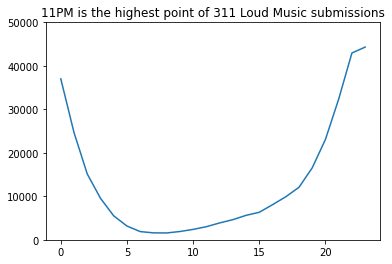

In [49]:
df[df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts() \
    .sort_index() \
    .plot(
        ylim=(0, 50000),
        title='11PM is the highest point of 311 Loud Music submissions'
    )

## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

<AxesSubplot:xlabel='created_date'>

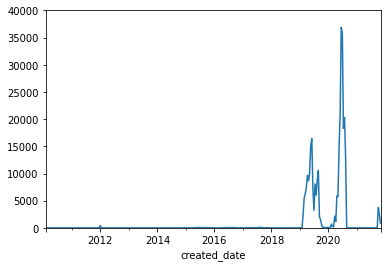

In [56]:
df[df.descriptor == 'Loud Music/Party'] \
    .resample('2W', on='created_date') \
    .size() \
    .plot(ylim=(0, 40000))

## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [58]:
df[df.complaint_type.str.contains("bee", na=False, case=False)]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893199,46725680,2020-07-03 15:51:53,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10301,163 CORSON AVENUE,NaN,STATEN ISLAND,In Progress,STATEN ISLAND,ONLINE
6931157,43665783,2019-08-28 19:21:54,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10470,4569 FURMAN AVENUE,NaN,BRONX,In Progress,BRONX,PHONE
6964418,43680603,2019-08-30 20:04:56,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11422,142-25 250 STREET,NaN,ROSEDALE,In Progress,QUEENS,PHONE
6973573,46810693,2020-07-10 20:00:39,NaT,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11378,53-41 72 PLACE,NaN,MASPETH,In Progress,QUEENS,ONLINE


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:>

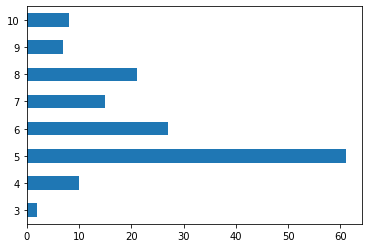

In [59]:
# most complaints happen in May
df[df.complaint_type == "Harboring Bees/Wasps"].created_date.dt.month.value_counts().sort_index().plot(kind='barh')

### Are the people getting in trouble usually beekeepers or not beekeepers?

In [61]:
df.descriptor[df.complaint_type == "Harboring Bees/Wasps"].value_counts()
# The are more not beekepers complaining

Bees/Wasps - Not a beekeper    119
Beekeeping - Honeybees          32
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [62]:
df['time_to_fix'] = df['closed_date'] - df['created_date']

Save it as a new column called `time_to_fix`

## Which agency has the best time-to-fix time?

In [64]:
df.groupby('agency').time_to_fix.median().sort_values()

agency
EDC                                               0 days 00:00:05
3-1-1                                             0 days 00:00:37
HRA                                               0 days 00:00:38
NYPD                                              0 days 00:57:03
DOHMH                                      0 days 02:41:16.500000
DHS                                               0 days 04:39:23
DOT                                               0 days 16:18:50
DEP                                               0 days 22:34:00
DORIS                                             1 days 00:03:53
DSNY                                              1 days 22:17:00
DCA                                        1 days 22:39:30.500000
MAYORâS OFFICE OF SPECIAL ENFORCEMENT           2 days 03:23:04
DOF                                               2 days 18:01:52
DPR                                               3 days 23:10:52
DOE                                        5 days 01:19:55.500000
HPD

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [65]:
df.groupby('agency').time_to_fix.describe()

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
3-1-1,39,0 days 00:01:07.589743589,0 days 00:01:36.643870921,0 days 00:00:03,0 days 00:00:26,0 days 00:00:37,0 days 00:00:58,0 days 00:07:44
ACS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
COIB,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCA,25036,34 days 05:18:54.670115034,99 days 19:53:37.146073115,0 days 00:04:02,0 days 22:25:00.750000,1 days 22:52:50.500000,6 days 22:13:20.250000,804 days 21:18:42
DCAS,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DCP,0,NaT,NaT,NaT,NaT,NaT,NaT,NaT
DEP,310380,9 days 11:05:50.446936014,64 days 02:55:44.238188981,-1062 days +08:42:00,0 days 02:51:00,0 days 23:05:00,4 days 08:24:00,4004 days 05:55:00
DFTA,4315,9 days 17:32:46.468597914,24 days 15:43:18.603337600,0 days 00:04:30,3 days 00:51:04.500000,9 days 23:40:41,13 days 21:30:39.500000,1506 days 10:19:19
DHS,38584,4 days 14:44:27.101674269,15 days 06:13:51.652897115,0 days 00:00:04,0 days 00:55:25.750000,0 days 04:47:07,5 days 02:15:48.500000,586 days 12:35:49


### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [66]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
3-1-1,0 days 00:00:37,41
ACS,NaT,127
COIB,NaT,4
DCA,1 days 22:39:30.500000,25132
DCAS,NaT,281
DCP,NaT,9
DEP,0 days 22:34:00,314050
DFTA,9 days 23:39:37,4316
DHS,0 days 04:39:23,38766


In [67]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix         
                                                         median     size
agency                                                                  
3-1-1                                           0 days 00:00:37       41
ACS                                                         NaT      127
COIB                                                        NaT        4
DCA                                      1 days 22:39:30.500000    25132
DCAS                                                        NaT      281
DCP                                                         NaT        9
DEP                                             0 days 22:34:00   314050
DFTA                                            9 days 23:39:37     4316
DHS                                             0 days 04:39:23    38766
DOB                                      9 days 10:53:10.500000   517204
DOE                                      5 days 01:19:55.500000      926
DOF                                             2 days 18:01:52   138575
DOHMH                                    0 days 02:41:16.500000    45870
DOITT                                   16 days 20:31:25.500000      330
DORIS                                           1 days 00:03:53       53
DOT                                             0 days 16:18:50   883962
DPR                                             3 days 23:10:52   134283
DSNY                                            1 days 22:17:00   736619
DVS                                                         NaT      120
EDC                                             0 days 00:00:05     4462
FDNY                                                        NaT        5
HPD                                             6 days 00:00:00  3212165
HRA                                             0 days 00:00:38    66659
MAYORâS OFFICE OF SPECIAL ENFORCEMENT         2 days 03:23:04    13111
NYCEM                                          10 days 05:28:23     1425
NYPD                                            0 days 00:57:03   843960
TAX                                                         NaT       87
TLC                                            13 days 17:58:11    17458

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [68]:
df[df.agency == 'NYPD'].groupby('complaint_type') \
    .time_to_fix.agg(['median', 'size']) \
    .sort_values(by='median')

,median,size
complaint_type,,
Illegal Fireworks,0 days 00:16:44,41768
Non-Emergency Police Matter,0 days 00:21:24,50478
Homeless Street Condition,0 days 00:21:42,4397
Graffiti,0 days 00:33:04.500000,958
Noise - Street/Sidewalk,0 days 00:35:25,143433
Noise - Vehicle,0 days 00:38:59,49276
Squeegee,0 days 00:43:32,6
Drinking,0 days 00:45:37,2015
Urinating in Public,0 days 00:47:09,661


## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [69]:
df.groupby(['agency', 'borough']).time_to_fix.agg(['median', 'size'])

median  size
agency borough                                    
3-1-1  BROOKLYN              0 days 00:00:55    12
       MANHATTAN             0 days 00:00:28    21
       QUEENS         0 days 00:00:49.500000     6
       Unspecified    0 days 00:00:07.500000     2
ACS    Unspecified                       NaT   127
...                                      ...   ...
TLC    BROOKLYN      22 days 23:36:17.500000  2640
       MANHATTAN             5 days 14:57:54  9071
       QUEENS        20 days 22:30:08.500000  2556
       STATEN ISLAND        25 days 15:32:26    79
       Unspecified          13 days 19:31:49  2349

[117 rows x 2 columns]

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [70]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc= 'median'
)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
3-1-1,NaT,0 days 00:00:55,0 days 00:00:28,0 days 00:00:49.500000,NaT,0 days 00:00:07.500000
DCA,1 days 19:55:56,1 days 19:51:45.500000,1 days 21:54:23,2 days 00:59:57,2 days 01:50:14,1 days 23:55:40
DEP,0 days 20:01:00,0 days 17:19:00,1 days 21:11:00,0 days 19:25:00,0 days 18:58:00,29 days 12:35:00
DFTA,11 days 18:17:38,6 days 19:20:58,10 days 02:12:23,10 days 23:59:46,10 days 21:04:10.500000,11 days 18:56:50
DHS,5 days 20:37:41.500000,0 days 22:16:19.500000,0 days 01:28:55.500000,0 days 11:24:05,6 days 19:41:07,0 days 00:07:48
DOB,17 days 12:30:09.500000,6 days 15:42:18.500000,7 days 03:48:54,13 days 09:48:04,8 days 15:18:23.500000,0 days 00:00:00
DOE,5 days 00:19:35,4 days 00:33:05,7 days 21:19:03.500000,4 days 20:59:48,7 days 21:44:30,4 days 18:50:09
DOF,2 days 03:38:53.500000,2 days 02:48:07.500000,2 days 00:43:03.500000,2 days 03:43:21,2 days 16:12:20,4 days 07:15:07.500000
DOHMH,0 days 00:26:08,0 days 11:18:28,0 days 00:00:01,0 days 14:11:54.500000,0 days 18:43:37.500000,NaT


### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [72]:
# In both cases the agency is  TLC
# df[df.agency_name == 'Department of Housing Preservation and Development']
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
).sort_values(by='BRONX', ascending=False)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,29 days 14:20:10,22 days 23:36:17.500000,5 days 14:57:54,20 days 22:30:08.500000,25 days 15:32:26,13 days 19:31:49
DOITT,20 days 00:40:09,14 days 20:03:56,17 days 16:16:47,15 days 20:50:23,15 days 09:53:36,31 days 19:26:36
DOB,17 days 12:30:09.500000,6 days 15:42:18.500000,7 days 03:48:54,13 days 09:48:04,8 days 15:18:23.500000,0 days 00:00:00
DFTA,11 days 18:17:38,6 days 19:20:58,10 days 02:12:23,10 days 23:59:46,10 days 21:04:10.500000,11 days 18:56:50
DHS,5 days 20:37:41.500000,0 days 22:16:19.500000,0 days 01:28:55.500000,0 days 11:24:05,6 days 19:41:07,0 days 00:07:48
DOE,5 days 00:19:35,4 days 00:33:05,7 days 21:19:03.500000,4 days 20:59:48,7 days 21:44:30,4 days 18:50:09
HPD,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,7 days 00:00:00,6 days 00:00:00
DPR,3 days 20:00:47,4 days 02:40:07,4 days 04:56:48,4 days 02:29:40,2 days 07:16:16,5 days 01:23:34
DOF,2 days 03:38:53.500000,2 days 02:48:07.500000,2 days 00:43:03.500000,2 days 03:43:21,2 days 16:12:20,4 days 07:15:07.500000


In [73]:
df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median'
).sort_values(by='STATEN ISLAND', ascending=False)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
TLC,29 days 14:20:10,22 days 23:36:17.500000,5 days 14:57:54,20 days 22:30:08.500000,25 days 15:32:26,13 days 19:31:49
EDC,0 days 00:00:04.500000,18 days 04:35:43.500000,0 days 00:00:03,0 days 00:00:03,16 days 10:45:17,48 days 19:23:19
DOITT,20 days 00:40:09,14 days 20:03:56,17 days 16:16:47,15 days 20:50:23,15 days 09:53:36,31 days 19:26:36
DFTA,11 days 18:17:38,6 days 19:20:58,10 days 02:12:23,10 days 23:59:46,10 days 21:04:10.500000,11 days 18:56:50
DOB,17 days 12:30:09.500000,6 days 15:42:18.500000,7 days 03:48:54,13 days 09:48:04,8 days 15:18:23.500000,0 days 00:00:00
DOE,5 days 00:19:35,4 days 00:33:05,7 days 21:19:03.500000,4 days 20:59:48,7 days 21:44:30,4 days 18:50:09
HPD,5 days 00:00:00,5 days 00:00:00,6 days 00:00:00,7 days 00:00:00,7 days 00:00:00,6 days 00:00:00
DHS,5 days 20:37:41.500000,0 days 22:16:19.500000,0 days 01:28:55.500000,0 days 11:24:05,6 days 19:41:07,0 days 00:07:48
MAYORâS OFFICE OF SPECIAL ENFORCEMENT,1 days 21:48:35,2 days 20:04:07,1 days 12:45:10,2 days 18:31:12,2 days 21:32:41.500000,50 days 22:02:18


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [74]:
df.complaint_type[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')].value_counts().head(10)

Elevator                                   14
Traffic Signal Condition                   11
Dirty Conditions                            6
Missed Collection (All Materials)           5
General Construction/Plumbing               5
Special Projects Inspection Team (SPIT)     3
Derelict Vehicles                           3
HEAT/HOT WATER                              3
Boilers                                     2
GENERAL                                     2
Name: complaint_type, dtype: int64

In [75]:
# Day before Thanksgiving
df.complaint_type[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')].value_counts().head(10)

Street Light Condition               76
Traffic Signal Condition             40
Missed Collection (All Materials)    29
Derelict Vehicles                    14
Elevator                             14
General Construction/Plumbing        13
Dirty Conditions                      9
Water System                          7
Noise                                 5
HEAT/HOT WATER                        5
Name: complaint_type, dtype: int64

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [76]:
df.complaint_type[(df['created_date'].dt.day==25) & (df['created_date'].dt.month==12)].value_counts().head(5)
# The most common 311 complaints are related to heating problems

HEATING                 3556
HEAT/HOT WATER           673
Street Condition         414
PLUMBING                 392
GENERAL CONSTRUCTION     335
Name: complaint_type, dtype: int64

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

<AxesSubplot:xlabel='created_date'>

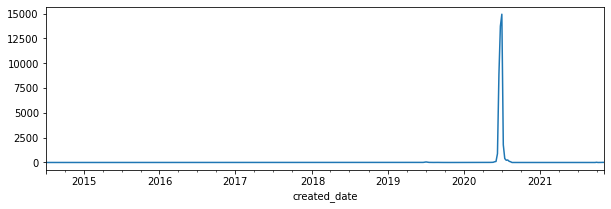

In [78]:
df[df.complaint_type == 'Illegal Fireworks'] \
    .resample('W', on='created_date') \
    .size().plot(figsize=(10, 3))

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

<AxesSubplot:xlabel='created_date'>

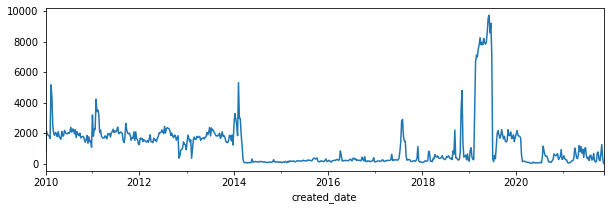

In [79]:
df[df.agency == 'DSNY'] \
    .resample('W', on='created_date') \
    .size().plot(figsize=(10, 3))

In [80]:
df[(df.created_date > '2021-10-01') & (df.agency == 'DSNY')] \
    .borough \
    .value_counts(normalize=True)

QUEENS           0.324975
BROOKLYN         0.301593
STATEN ISLAND    0.155540
BRONX            0.118604
MANHATTAN        0.098611
Unspecified      0.000678
Name: borough, dtype: float64

In [81]:
df[(df.created_date < '2021-10-01') & (df.agency == 'DSNY')] \
    .borough \
    .value_counts(normalize=True)

BROOKLYN         0.357268
QUEENS           0.308380
BRONX            0.113841
MANHATTAN        0.111060
STATEN ISLAND    0.108737
Unspecified      0.000715
Name: borough, dtype: float64

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

In [84]:
df.resample('H', on='created_date').size().sort_values()

created_date
2014-04-20 02:00:00       0
2014-01-19 04:00:00       0
2016-10-24 04:00:00       0
2014-01-20 02:00:00       0
2014-01-20 03:00:00       0
                       ... 
2013-11-25 00:00:00    5806
2012-01-04 00:00:00    5883
2014-01-08 00:00:00    5995
2014-01-07 00:00:00    6847
2013-01-24 00:00:00    7581
Length: 103988, dtype: int64

In [85]:
(pd.crosstab(df.agency, df.open_data_channel_type, normalize='index') * 100).astype(int)

open_data_channel_type,MOBILE,ONLINE,OTHER,PHONE
agency,,,,
3-1-1,0,82,0,17
ACS,0,100,0,0
COIB,0,100,0,0
DCA,0,24,0,75
DCAS,0,100,0,0
DCP,0,100,0,0
DEP,2,34,5,57
DFTA,0,18,0,81
DHS,42,1,0,55
